# 탐색적 요인분석 ONLY 
2022-10-27

## 데이터 로드

In [1]:
# 데이터 로딩
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import tensorflow as tf
import numpy as np 
import pandas as pd
from numpy import sin, cos, arccos, radians
import openpyxl
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

# 교수님 모델 라이브러리
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras import Input, layers
from sklearn.model_selection import train_test_split

# 현진 추가
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity # 정합성 평가


2022-11-24 16:56:18.967210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 16:56:19.174119: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-24 16:56:19.181650: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-24 16:56:19.181671: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [2]:
# 그래프 한글 깨져서 서버에 폰트 주소 확인함
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

['/usr/share/fonts/overpass/Overpass-ExtraLight Italic.ttf',
 '/usr/share/fonts/gnu-free/FreeMono.ttf',
 '/usr/share/fonts/overpass/Overpass-ExtraLight.ttf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-Oblique.otf',
 '/usr/share/fonts/google-crosextra-carlito/Carlito-Regular.ttf',
 '/usr/share/fonts/urw-base35/C059-BdIta.otf',
 '/usr/share/fonts/thai-scalable/Waree.ttf',
 '/usr/share/fonts/google-crosextra-caladea/Caladea-Regular.ttf',
 '/usr/share/fonts/google-crosextra-carlito/Carlito-Italic.ttf',
 '/usr/share/fonts/urw-base35/C059-Italic.otf',
 '/usr/share/fonts/overpass/Overpass-Regular.ttf',
 '/usr/share/fonts/abattis-cantarell/Cantarell-BoldOblique.otf',
 '/usr/share/fonts/thai-scalable/Waree-Bold.ttf',
 '/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/sil-padauk/Padauk.ttf',
 '/usr/share/fonts/urw-base35/NimbusRoman-Regular.otf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed.ttf',
 '/usr/share/fonts/dejavu/DejaVuSerifCondensed-BoldItalic.ttf',
 '/usr/sha

In [3]:
#한글폰트 깨짐 처리
fm.get_fontconfig_fonts()
font_location = '/usr/share/fonts/nhn-nanum/NanumGothicExtraBold.ttf'# For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

/tmp/ipykernel_265511/4244894366.py:2: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  fm.get_fontconfig_fonts()


In [4]:
# 카드 소비 데이터 

card21=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(BC카드)아산시 거주고객의 충남 지역 소비데이터_2021.xlsx', engine='openpyxl')

KeyboardInterrupt: 

In [5]:
# 교통 데이터

bus=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(교통)버스정거장_3차가공(완).xlsx', engine='openpyxl')

In [6]:
# 문화시설 정보 데이터 

shop=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(문화시설)상가정보(완).xlsx', engine='openpyxl')

In [7]:
# 도서관 단순 위치 정보

libr=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(아산시)도서관정보_정제(완).xlsx', engine='openpyxl')
# libr=pd.read_csv('/data1/KSW/아산시/교수님꺼/(최종)도서관_입지후보_용지.csv', encoding='cp949')

In [8]:
# 도서관( 명칭, 위치, 대출건수, 회원수 통계)
libr1=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/도서관 위치정보.xlsx', engine='openpyxl')

In [9]:
# 성연령별 유동인구  # 동부 및 중앙임 

with open("/data1/KSW/아산시/교수님꺼/data/(유동인구)2019년_성연령별_유동인구(동부및중부생활권).pickle","rb") as fr:
    tran19 = pickle.load(fr)
    
with open("/data1/KSW/아산시/교수님꺼/data/(유동인구)2021년_성연령별_유동인구(동부및중부생활권).pickle","rb") as fr:
    trans21 = pickle.load(fr)

In [10]:
# 전체데이터 불러와서 다음 실행 속도를 위해 피클로 변환해 저장함
trans21 = pd.read_excel("./data/(유동인구)2021년_성연령별_유동인구_1.xlsx", engine='openpyxl')
trans21.to_pickle("(유동인구)2021년_성연령별_유동인구_1.pickle")

In [11]:
trans212 = pd.read_excel("./data/(유동인구)2021년_성연령별_유동인구_2.xlsx", engine='openpyxl')
trans212.to_pickle("(유동인구)2021년_성연령별_유동인구_2.pickle")

In [12]:
# 전체 유동인구 데이터 취합
trans21_t = trans21.append(trans212, ignore_index = True)
trans21_t

/tmp/ipykernel_265511/919457481.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trans21_t = trans21.append(trans212, ignore_index = True)


,Unnamed: 0,crtr_ym,sm_lc_cd,coord_x,coord_y,ml_10,ml_20,ml_30,ml_40,ml_50,...,fm_40,fm_50,fm_60,adong_cd,adong_nm,총유동인구,남성유동인구,여성유동인구,행정동중심_위도,행정동중심_경도
0,1,202108,34040530100020000001,957783.991787,1.865379e+06,0.86,0.64,1.27,1.34,1.01,...,1.30,0.69,0.56,"""4420059000""",온양3동,11.05,5.69,5.36,36.783503,127.012858
1,2,202108,34040530100020000001,957783.991787,1.865579e+06,2.31,1.50,1.75,1.73,2.00,...,1.81,2.43,3.32,"""4420059000""",온양3동,27.13,12.96,14.17,36.783503,127.012858
2,3,202108,34040530100020000001,957783.991787,1.865629e+06,19.22,15.15,30.06,33.41,31.32,...,25.37,22.02,19.55,"""4420059000""",온양3동,286.43,150.89,135.54,36.783503,127.012858
3,4,202108,34040530100020000001,957783.991787,1.865679e+06,5.25,3.08,6.55,5.46,3.16,...,6.15,3.63,2.00,"""4420059000""",온양3동,49.50,24.96,24.54,36.783503,127.012858
4,5,202108,34040530100020000001,957783.991787,1.865779e+06,203.07,164.07,351.86,377.63,289.39,...,290.83,186.80,152.34,"""4420059000""",온양3동,2854.10,1552.60,1301.50,36.783503,127.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058697,1058734,202108,34040530100020000001,957733.991787,1.866029e+06,0.00,0.00,0.21,0.22,0.10,...,0.00,0.00,0.00,"""4420059000""",온양3동,0.53,0.53,0.00,36.783503,127.012858
1058698,1058735,202108,34040530100020000001,957783.991787,1.864979e+06,3.32,2.01,3.98,3.58,2.80,...,3.48,2.23,2.12,"""4420059000""",온양3동,35.61,17.61,18.00,36.783503,127.012858
1058699,1058736,202108,34040530100020000001,957783.991787,1.865029e+06,1.17,1.40,2.79,3.41,4.02,...,2.34,2.71,2.82,"""4420059000""",온양3동,29.38,16.08,13.30,36.783503,127.012858
1058700,1058737,202108,34040530100020000001,957783.991787,1.865079e+06,1.88,1.63,3.26,3.26,2.88,...,2.80,2.24,1.86,"""4420059000""",온양3동,28.76,14.99,13.77,36.783503,127.012858


In [13]:
# 주민등록 인구
pop=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(인구)주민등록인구(완).xlsx', engine='openpyxl')

In [14]:
# 학교 

schol1 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','유치원', engine='openpyxl')
schol2 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','초등학교', engine='openpyxl')
schol3 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','중학교', engine='openpyxl')
schol4 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','고등학교', engine='openpyxl')
schol5 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','대학교', engine='openpyxl')
schol6 = pd.read_excel('/data1/KSW/아산시/교수님꺼/data/(학교)아산전체학교_정제(완).xlsx','대학원', engine='openpyxl')

In [15]:
# 링캠도서관 이용자 정보

user=pd.read_excel('/data1/KSW/아산시/교수님꺼/data/링캠도서이용자_정제(1차_완).xlsx', engine='openpyxl')
user_s=user[['BIRTHDAY','GPIN_SEX', '행정동', '행정동중심_위도','행정동중심_경도']]


In [16]:
# 링캠도서관 대출 로그

with open( "/data1/KSW/아산시/교수님꺼/data/my_pickle", "rb" ) as file:
    loan_s = pickle.load(file)

In [ ]:
loan_s

In [35]:
libr1.head()

,도서관명,대출건수,위도,경도,회원수
0,아산중앙도서관,1924590,36.800203,127.014193,0
1,아산시꿈샘어린이청소년도서관,215687,36.794453,127.004305,4539
2,아산시둔포도서관,133018,36.926392,127.040898,4423
3,아산시배방도서관,577428,36.773912,127.057794,10347
4,아산시송곡도서관,243743,36.791932,126.957919,589


In [26]:
schol1

,Unnamed: 0,학교명,년도,학급수,학생수(명),우편번호,주소,연락처,위도,경도,행정동,행정동중심_위도,행정동중심_경도,Unnamed: 13,Unnamed: 14
0,0,온양동신유치원,2019,8,145,31526,충남 아산시 번영로 234번길52,041-548-3345,36.779594,127.017082,온양3동,36.783503,127.012858,NaN,ACOS(COS(RADIANS(90-지점1의위도))*COS(RADIANS(90-지점...
1,1,아산흰돌유치원,2019,6,85,31402,충남 아산시 영인면 아산호로 229,041-549-6313,36.890109,126.943310,영인면,36.885130,126.962584,NaN,12.153934
2,2,배방유치원,2019,8,130,31487,충남 아산시 배방읍 북수로 25번길 10,041-549-0141,36.772331,127.063849,배방읍,36.754095,127.068357,NaN,NaN
3,3,온양초등학교병설유치원,2019,1,20,31562,충남 아산시 온주길 26번길 10,041-549-7036,36.760610,127.018068,온양6동,36.760953,127.015723,NaN,NaN
4,4,온양온천초등학교병설유치원,2019,4,65,31520,충남 아산시 청운로 90,041-544-9822,36.783300,127.008816,온양1동,36.787194,126.999478,NaN,NaN
5,5,온양중앙초등학교병설유치원,2019,1,20,31570,충남 아산시 중앙로 17,041-546-5909,36.776833,127.001757,온양2동,36.778414,127.003379,NaN,NaN
6,6,용화초등학교병설유치원,2019,1,25,31569,충남 아산시 시민로 258번길 3-8,041-549-7490,36.773118,126.996372,온양5동,36.775216,126.996027,NaN,NaN
7,7,온양초사초등학교병설유치원,2019,1,15,31559,충남 아산시 초사길 122,041-532-2139,36.751211,126.973529,온양5동,36.775216,126.996027,NaN,NaN
8,8,온양천도초등학교병설유치원,2019,4,60,31504,충남 아산시 실옥로 45,041-544-4860,36.786976,126.992198,온양4동,36.788478,126.984022,NaN,NaN
9,9,신리초등학교병설유치원,2019,4,60,31517,충남 아산시 모종로 73-13,041-425-2095,36.786481,127.024359,온양3동,36.783503,127.012858,NaN,NaN


## 데이터 분석 범위 설정

### 거주등록인구

In [442]:
#거주 등록인구 데이터는 2021년 12월 기준으로 설정
pop_sub = pop[(pop['측정년도']==2021)& (pop['측정월']==12)].iloc[:,3:]
pop_sub.drop(['측정년도','측정월'], axis=1, inplace =True)

In [443]:
# 유동인구의 연령 카테고리와 일치
pop_sub['P1'] = pop_sub['0~9세']+pop['10~19세']
pop_sub['P2'] = pop_sub['20~29세']
pop_sub['P3'] = pop_sub['30~39세']
pop_sub['P4'] = pop_sub['40~49세']
pop_sub['P5'] = pop_sub['50~59세']
pop_sub['P6'] = pop_sub['60~69세']+pop['70~79세']+pop['80~89세']+pop['90~99세']+pop['100세 이상']

In [444]:
pop_ssub =  pop_sub.iloc[:,13:]
pop_ssub['P7']  = pop_sub['연령구간인구수'] #총인구수
#pop_sub.colunms = ['ymd_name','총인구수','P1','P2','P3','P4','P6']

In [445]:
pop_ssub['ymb_name']=pop_sub['Unnamed: 3']

In [446]:
pop_ssub

,행정동중심_위도,행정동중심_경도,P1,P2,P3,P4,P5,P6,P7,ymb_name
35,36.809157,127.068452,6709.0,3197,4417,5483,2833,2271.0,24910,탕정면
77,36.859881,126.885053,635.0,513,568,900,1176,2451.0,6243,인주면
119,36.858061,127.047785,4290.0,2129,3484,3603,2855,4047.0,20408,음봉면
161,36.760953,127.015723,6552.0,2800,3888,5566,4496,5481.0,28783,온양6동
203,36.775216,126.996027,4696.0,2737,2720,4022,3485,3782.0,21442,온양5동
245,36.788478,126.984022,3746.0,2137,1978,3390,3241,4065.0,18557,온양4동
287,36.783503,127.012858,8522.0,4440,4769,6984,5531,6331.0,36577,온양3동
329,36.778414,127.003379,1190.0,1683,1190,1432,2016,3235.0,10746,온양2동
371,36.787194,126.999478,1573.0,1106,1682,1512,1293,2178.0,9344,온양1동
413,36.885130,126.962584,393.0,410,404,536,973,2809.0,5525,영인면


거주등록 인구의 데이터 연령을 유동인구 데이터 자체내 데이터 카테고리와 동일시로 묶어서 진행할때, 후의 요인 분석에서 제대로 구분 할 수 없음.
60대 이상을 앞 연령대와 동일 처리함

In [320]:
pop_ssub2 = pop_sub.iloc[:,1:-8] # 이 데이터를 활용해서 다시 정합성 및, 요인파악
pop_ssub2

,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
35,24910,3202,3507,3197,4417,5483,2833,1273,608,336,53,1
77,6243,255,380,513,568,900,1176,1206,663,506,75,1
119,20408,2428,1862,2129,3484,3603,2855,2370,1015,569,92,1
161,28783,3006,3546,2800,3888,5566,4496,2966,1552,857,103,3
203,21442,1972,2724,2737,2720,4022,3485,2090,1072,545,70,5
245,18557,1404,2342,2137,1978,3390,3241,2220,1190,568,86,1
287,36577,3626,4896,4440,4769,6984,5531,3526,1814,872,115,4
329,10746,403,787,1683,1190,1432,2016,1735,964,467,65,4
371,9344,858,715,1106,1682,1512,1293,1164,655,305,50,4
413,5525,136,257,410,404,536,973,1306,835,580,86,2


### 성연령별 유동인구 
trans21_t : 전체지역 유동인구

In [367]:
# 2021년 유동인구
# 연령대별 set
trans21_t['T1'] = trans21_t['ml_10'] + trans21_t['fm_10']
trans21_t['T2'] = trans21_t['ml_20'] + trans21_t['fm_20']
trans21_t['T3'] = trans21_t['ml_30'] + trans21_t['fm_30']
trans21_t['T4'] = trans21_t['ml_40'] + trans21_t['fm_40'] 
trans21_t['T5'] = trans21_t['ml_50'] + trans21_t['fm_50']
trans21_t['T6'] = trans21_t['ml_60'] + trans21_t['fm_60']

trans21_t['T7'] = trans21_t['총유동인구'] # 총유동인구
# 성별간 도서관 선택에 차이 없음 따라서, 연령만 확인

In [368]:
trans21_t.iloc[:,22:] # 전체

,행정동중심_위도,행정동중심_경도,T1,T2,T3,T4,T5,T6,T7
0,36.783503,127.012858,1.63,1.13,2.82,2.64,1.70,1.13,11.05
1,36.783503,127.012858,4.95,3.19,4.03,3.54,4.43,6.99,27.13
2,36.783503,127.012858,42.10,27.69,63.24,58.78,53.34,41.28,286.43
3,36.783503,127.012858,8.45,5.57,13.62,11.61,6.79,3.46,49.50
4,36.783503,127.012858,397.96,297.36,695.21,668.46,476.19,318.92,2854.10
...,...,...,...,...,...,...,...,...,...
1058697,36.783503,127.012858,0.00,0.00,0.21,0.22,0.10,0.00,0.53
1058698,36.783503,127.012858,6.50,4.02,8.96,7.06,5.03,4.04,35.61
1058699,36.783503,127.012858,2.64,2.58,5.57,5.75,6.73,6.11,29.38
1058700,36.783503,127.012858,3.77,3.21,6.66,6.06,5.12,3.94,28.76


In [351]:
# 읍면동별 연령대별 총 유동인구 
trans21_tt = pd.DataFrame(trans21_t.groupby(trans21_t['adong_nm']).sum()).iloc[:,19:]
trans21_tt

,행정동중심_위도,행정동중심_경도,T1,T2,T3,T4,T5,T6,T7
adong_nm,,,,,,,,,
도고면,1.911293e+06,6.601675e+06,665146.77,1307601.68,1836969.06,2269599.95,2525446.12,2948824.49,1.155359e+07
둔포면,4.325812e+06,1.488847e+07,2936653.53,6249214.06,11452622.26,11458038.17,9304263.14,6736846.93,4.813764e+07
배방읍,4.064488e+06,1.405198e+07,23302571.64,23232244.89,33855617.78,28781227.53,19633242.65,13130565.12,1.419355e+08
선장면,1.943414e+06,6.701228e+06,295196.78,717688.37,1474687.85,1713228.92,1723706.39,2088752.36,8.013261e+06
송악면,2.401253e+06,8.308340e+06,731694.93,756214.06,1213817.89,1591364.06,1915819.44,1993184.14,8.202095e+06
신창면,2.971149e+06,1.025092e+07,6987908.50,10943260.05,8278541.40,8224416.55,6444283.62,5741584.89,4.662000e+07
염치읍,2.854055e+06,9.842391e+06,2093749.60,2540598.26,5067572.95,5641948.01,5216547.04,4207431.81,2.476785e+07
영인면,3.536694e+06,1.217368e+07,871640.18,2035913.67,3903764.67,4609910.51,4621716.51,4007829.31,2.005077e+07
온양1동,2.622191e+05,9.052523e+05,4153530.90,3504937.12,4926009.17,5460352.08,4898983.68,5350931.59,2.829474e+07


In [102]:
# 유동인구 데이터 행정동별 pivoting ; 한칼럼으로 하는게 편해서
# trans21.pivot(index='adong_nm',columns=['T1','T2','T3','T4','T5','T6','T7'])

,행정동중심_위도,행정동중심_경도,T1,T2,T3,T4,T5,T6,T7
adong_nm,,,,,,,,,
배방읍,4.064488e+06,1.405198e+07,23302571.64,23232244.89,33855617.78,28781227.53,19633242.65,13130565.12,1.419355e+08
신창면,2.971149e+06,1.025092e+07,6987908.50,10943260.05,8278541.40,8224416.55,6444283.62,5741584.89,4.662000e+07
염치읍,2.854055e+06,9.842391e+06,2093749.60,2540598.26,5067572.95,5641948.01,5216547.04,4207431.81,2.476785e+07
온양1동,2.622191e+05,9.052523e+05,4153530.90,3504937.12,4926009.17,5460352.08,4898983.68,5350931.59,2.829474e+07
온양2동,1.218101e+05,4.206352e+05,3463563.72,3316261.34,3698553.81,4262428.46,4026871.88,4578562.67,2.334624e+07
온양3동,8.364936e+05,2.888399e+06,12720009.27,8240208.73,12148507.29,12321642.40,8866203.15,7790699.49,6.208727e+07
온양4동,1.121644e+06,3.871616e+06,6718362.43,4662935.61,7285781.22,8284280.26,6190258.68,5421989.43,3.856361e+07
온양5동,1.173387e+06,4.052062e+06,7684719.99,5735569.28,7600004.33,7861251.54,6050502.15,5137436.31,4.006948e+07
온양6동,9.812234e+05,3.390304e+06,7642071.16,4803926.13,8023621.34,8416128.09,6047729.59,5290870.43,4.022435e+07


### 학교인구

In [180]:
schol1_s

,학급수,학생수(명),행정동중심_경도,행정동중심_위도
행정동,,,,
도고면,1.000000,17.500000,126.904044,36.740800
둔포면,5.666667,108.333333,127.039072,36.910915
배방읍,7.166667,153.583333,127.068357,36.754095
선장면,1.000000,20.000000,126.869136,36.793145
송악면,1.000000,17.500000,126.994174,36.703504
신창면,3.333333,78.333333,126.933819,36.790769
염치읍,4.000000,95.000000,126.982215,36.821760
영인면,6.000000,85.000000,126.962584,36.885130
온양1동,4.000000,65.000000,126.999478,36.787194


In [179]:
schol11

,학급수,학생수(명),행정동
도고면,1.000000,17.500000,2
둔포면,5.666667,108.333333,6
배방읍,7.166667,153.583333,12
선장면,1.000000,20.000000,1
송악면,1.000000,17.500000,2
신창면,3.333333,78.333333,3
염치읍,4.000000,95.000000,3
영인면,6.000000,85.000000,1
온양1동,4.000000,65.000000,1
온양2동,1.000000,20.000000,1


In [178]:
# 교수님 
schol1 = schol1[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]


schol1_count=schol1.행정동.value_counts()
schol1_s = schol1.pivot_table(index=['행정동'],  
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)

schol11=schol1_s.join(schol1_count, how='inner') #학교수 추가 
schol11=schol11[['학급수', '학생수(명)', '행정동']]
schol11.columns = ['유1', '유2','유3'] #학급수 평균, 학생수 평균, 학교수

schol2 = schol2[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol2_count=schol2.행정동.value_counts()
schol2_s = schol2.pivot_table(index=['행정동'], 
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol22=schol2_s.join(schol2_count, how='inner')
schol22=schol22[['학급수', '학생수(명)', '행정동']]
schol22.columns = ['초1', '초2','초3']

schol3 = schol3[['중학교명', '분류', '학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동', '행정동중심_위도',
       '행정동중심_경도']]
schol3_count=schol3.행정동.value_counts()
schol3_s = schol3.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수',
                          '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                          '행정동', '행정동중심_위도',
                          '행정동중심_경도' ], aggfunc=np.mean)
schol33=schol3_s.join(schol3_count, how='inner')
schol33=schol33[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
schol33.columns = ['중1', '중2','중3', '중4','중5','중6','중7']

schol4 = schol4[['고등학교명','년도', '분류', '학급수', '남학생수', '여학생수', 
                 '교지면적 (㎡)', '건물면적 (㎡)', 
                 '교실수 (개)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol4 = schol4[schol4.년도 > 2020]
schol4_count=schol4.행정동.value_counts()
schol4_s = schol4.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수', 
                           '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                            '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol44=schol4_s.join(schol4_count, how='inner')
schol44=schol44[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
schol44.columns = ['고1', '고2','고3', '고4','고5','고6','고7']

schol5 = schol5[['대학교명', '측정년도', '남학생수', '여학생수', 
                 '교육기본시설면적 (m²)', '읍면동',
       '행정동중심_위도', '행정동중심_경도']]
schol5 = schol5[schol5.측정년도 > 2020]
schol5_count=schol5.읍면동.value_counts()
schol5_s = schol5.pivot_table(index=['읍면동'], 
                   values=['남학생수', '여학생수', '교육기본시설면적 (m²)' ], 
                   aggfunc=np.mean)
schol55=schol5_s.join(schol5_count, how='inner')
schol55=schol55[['남학생수', '여학생수', '교육기본시설면적 (m²)','읍면동']]
schol55.columns = ['대1', '대2','대3', '대4']

schol6 = schol6[['대학교명', '대학원명', '측정년도', '석사과정학생수(계)', 
                 '석사과정학생수(여)', '박사과정학생수(계)', '박사과정학생수(여)',
                 '읍면동', '행정동중심_위도', '행정동중심_경도']]
schol6 = schol6[schol6.측정년도 > 2020]
schol6_count=schol6.읍면동.value_counts()
schol6_s = schol6.pivot_table(index=['읍면동'], 
                   values=['석사과정학생수(계)', '석사과정학생수(여)', '박사과정학생수(계)', 
                           '박사과정학생수(여)','행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol66=schol6_s.join(schol6_count, how='inner')
schol66=schol66[['석사과정학생수(계)', '석사과정학생수(여)', '박사과정학생수(계)', 
        '박사과정학생수(여)','읍면동']]
schol66.columns = ['대원1', '대원2','대원3', '대원4', '대원5']

schol12=schol11.join(schol22, how='outer')
schol123=schol12.join(schol33, how='outer')
schol1234=schol123.join(schol44, how='outer')
schol12345=schol1234.join(schol55, how='outer')

schol12345.iloc[3,0:20]=schol12345.iloc[2,0:20]
tt=schol12345.values
tt = np.delete(tt, 2, 0)
schol12345 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=schol12345.columns)

schol123456=schol12345.join(schol66, how='outer')
schol123456.iloc[3,0:24]=schol123456.iloc[2,0:24]
tt=schol123456.values
tt = np.delete(tt, 2, 0)
schol123456 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=schol123456.columns)

교수님 df엔  초중고는 전체 학생수가 들어간 반면, 이후 데이터엔 총 학생수가 아닌 성별로 나누어져 데이터가 들어감. 또, 면적 등이 새로 추가되어, 상관없는 변수 제거함.

In [195]:
# 현진 수정


# 유치원
schol1 = schol1[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol1_count=schol1.행정동.value_counts()
schol1_s = schol1.pivot_table(index=['행정동'],  # 행정동별 피벗팅
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.sum)
schol11=schol1_s.join(schol1_count, how='inner') #학교수 추가 
schol11=schol11[['학급수', '학생수(명)', '행정동']]
schol11.columns = ['유1', '유2','유3'] #행정동별 학급수 합계, 행정동별 학생수 합계, 학교수


# 초등학교
schol2 = schol2[['학교명', '학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol2_count=schol2.행정동.value_counts()
schol2_s = schol2.pivot_table(index=['행정동'], 
                   values=['학급수', '학생수(명)', '행정동', '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol22=schol2_s.join(schol2_count, how='inner')
schol22=schol22[['학급수', '학생수(명)', '행정동']]
schol22.columns = ['초1', '초2','초3'] #행정동별 학급수 합계, 행정동별 학생수 합계, 학교수 


# 중학교
schol3 = schol3[['중학교명', '분류', '학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동', '행정동중심_위도',
       '행정동중심_경도']]
schol3_count=schol3.행정동.value_counts()
schol3_s = schol3.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수',
                          '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                          '행정동', '행정동중심_위도',
                          '행정동중심_경도' ], aggfunc=np.mean)
schol33=schol3_s.join(schol3_count, how='inner')
schol33=schol33[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
# 변수 레벨 맞춤
schol33_t=pd.DataFrame()
schol33_t['학급수'] =schol33['학급수']
schol33_t['학생수(명)'] = schol33['남학생수']+ schol33['여학생수']
schol33_t['학교수'] = schol33['행정동']

schol33_t.columns = ['중1', '중2','중3']



# 고등학교
schol4 = schol4[['고등학교명','년도', '분류', '학급수', '남학생수', '여학생수', 
                 '교지면적 (㎡)', '건물면적 (㎡)', 
                 '교실수 (개)', '행정동', '행정동중심_위도', '행정동중심_경도']]
schol4 = schol4[schol4.년도 > 2020] # 2021년도만 확인
schol4_count=schol4.행정동.value_counts()
schol4_s = schol4.pivot_table(index=['행정동'], 
                   values=['분류', '학급수', '남학생수', '여학생수', 
                           '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', 
                            '행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol44=schol4_s.join(schol4_count, how='inner')
schol44=schol44[['학급수', '남학생수', '여학생수',
       '교지면적 (㎡)', '건물면적 (㎡)', '교실수 (개)', '행정동',]]
# 변수 레벨 맞춤
schol44_t=pd.DataFrame()
schol44_t['학급수'] =schol44['학급수']
schol44_t['학생수(명)'] = schol44['남학생수']+ schol44['여학생수']
schol44_t['학교수'] = schol44['행정동']
schol44_t.columns = ['고1', '고2','고3']

# 대학교
schol5 = schol5[['대학교명', '측정년도', '남학생수', '여학생수', 
                 '교육기본시설면적 (m²)', '읍면동',
       '행정동중심_위도', '행정동중심_경도']]
schol5 = schol5[schol5.측정년도 > 2020] # 2021년도만 확인
schol5_count=schol5.읍면동.value_counts()
schol5_s = schol5.pivot_table(index=['읍면동'], 
                   values=['남학생수', '여학생수', '교육기본시설면적 (m²)' ], 
                   aggfunc=np.mean)
schol55=schol5_s.join(schol5_count, how='inner')
schol55=schol55[['남학생수', '여학생수', '교육기본시설면적 (m²)','읍면동']]
# 변수 레벨 맞춤
schol55_t=pd.DataFrame()
schol55_t['학생수(명)'] = schol55['남학생수']+ schol55['여학생수']
schol55_t['학교수'] = schol55['읍면동']
schol55_t.columns = ['대1', '대2']


# 대학원
schol6 = schol6[['대학교명', '대학원명', '측정년도', '석사과정학생수(계)', 
                 '석사과정학생수(여)', '박사과정학생수(계)', '박사과정학생수(여)',
                 '읍면동', '행정동중심_위도', '행정동중심_경도']]
schol6 = schol6[schol6.측정년도 > 2020] # 2021년도만 확인
schol6_count=schol6.읍면동.value_counts()
schol6_s = schol6.pivot_table(index=['읍면동'], 
                   values=['석사과정학생수(계)', '석사과정학생수(여)', '박사과정학생수(계)', 
                           '박사과정학생수(여)','행정동중심_위도', '행정동중심_경도' ], 
                   aggfunc=np.mean)
schol66=schol6_s.join(schol6_count, how='inner')
schol66=schol66[['석사과정학생수(계)', '박사과정학생수(계)','읍면동']]
# 변수 레벨 맞춤
schol66.columns = ['대원1', '대원2','대원3']


#schol66.columns = ['대원1', '대원2','대원3', '대원4', '대원5']

###


In [196]:
schol12=schol11.join(schol22, how='outer')
schol123=schol12.join(schol33_t, how='outer')
schol1234=schol123.join(schol44_t, how='outer')
schol12345=schol1234.join(schol55_t, how='outer')

schol12345

,유1,유2,유3,초1,초2,초3,중1,중2,중3,고1,고2,고3,대1,대2
도고면,2.0,35.0,2.0,6.000000,54.000000,2.0,3.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN
둔포면,34.0,650.0,6.0,18.000000,336.500000,4.0,8.5,197.0,2.0,14.0,281.0,1.0,NaN,NaN
배방읍,86.0,1843.0,12.0,29.125000,749.375000,8.0,28.0,797.0,3.0,36.0,1087.0,2.0,NaN,NaN
배방읍,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10673.0,1.0
선장면,1.0,20.0,1.0,7.000000,37.000000,1.0,3.0,61.0,1.0,NaN,NaN,NaN,NaN,NaN
송악면,2.0,35.0,2.0,8.500000,157.000000,2.0,6.0,116.0,1.0,NaN,NaN,NaN,NaN,NaN
신창면,10.0,235.0,3.0,26.000000,523.333333,3.0,11.0,230.0,1.0,NaN,NaN,NaN,7210.5,2.0
염치읍,12.0,285.0,3.0,9.500000,143.500000,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
영인면,6.0,85.0,1.0,6.500000,48.500000,2.0,7.0,83.0,1.0,NaN,NaN,NaN,NaN,NaN
온양1동,4.0,65.0,1.0,19.000000,420.000000,1.0,27.0,844.0,1.0,33.5,1005.5,2.0,NaN,NaN


In [206]:
schol12345.iloc[3,0:-2] = schol12345.iloc[2,0:-2] # 이상하게 outer된 값 직접 기입
schol12345.drop('배방읍',axis=0, inplace=True) # 중복으로 들어가 있는 이상한 값은 직접 제거
tt=schol12345.values
schol12345 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], 
                  columns=schol12345.columns)

In [254]:
schol123456.iloc[3,0:-3] =  schol123456.iloc[2,0:-3] # 이상하게 outer된 값 직접 기입
schol123456.drop('배방읍',axis=0, inplace=True) # 중복으로 들어가 있는 이상한 값은 직접 제거
tt=schol123456.values
schol123456 = pd.DataFrame(tt, index=['도고면', '둔포면', '배방읍', '선장면', 
                             '송악면', '신창면', '염치읍', '영인면', '온양1동',
                             '온양2동', '온양3동', '온양4동', '온양5동', '온양6동', 
                             '음봉면', '인주면', '탕정면'], columns=schol123456.columns)schol123456.iloc[3,0:-3] =  schol123456.iloc[2,0:-3] # 이상하게 outer된 값 직접 기입

In [256]:
schol123456=schol123456.fillna(0) 
scho=schol123456

In [264]:
# case : 교수님

# 스케일링 
scaler.fit(scho)
scho_scaled = scaler.transform(scho)
scho_scaled_df = pd.DataFrame(scho_scaled)


# 교수님 component 결정 값
factor = FactorAnalysis(n_components=2)
fac_scho=factor.fit_transform(scho)

fn=np.mean(cross_val_score(factor,scho))
fn  # 높은 값이 좋다  
# fin ■

-114.43199966026978

In [155]:
# 첫번째 교수님 df
scho_scaled_df.columns = ['유1','유2','유3','초1','초2','초3','중1', '중2','중3', '중4','중5','중6','중7','고1', '고2','고3', '고4','고5','고6','고7','대1','대2','대3','대4','대원1','대원2','대원3','대원4','대원5']
scho_scaled_df

,유1,유2,유3,초1,초2,초3,중1,중2,중3,중4,...,고7,대1,대2,대3,대4,대원1,대원2,대원3,대원4,대원5
0,0.139535,0.100962,0.166667,0.000000,0.020594,0.142857,0.100000,0.017773,0.013498,0.880289,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.790698,0.625000,0.500000,0.428571,0.362810,0.428571,0.283333,0.114929,0.112486,0.592583,...,0.5,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.000000,0.886058,1.000000,0.825893,0.862962,1.000000,0.933333,0.484202,0.436820,0.624426,...,1.0,0.884307,0.750374,0.731841,0.5,0.998788,0.445328,1.000000,1.000000,0.250000
3,0.139535,0.115385,0.083333,0.035714,0.000000,0.000000,0.100000,0.041469,0.029246,0.572586,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.139535,0.100962,0.166667,0.089286,0.145366,0.142857,0.200000,0.081754,0.052868,0.863508,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.465116,0.451923,0.250000,0.714286,0.589138,0.285714,0.366667,0.146919,0.119235,0.969468,...,0.0,0.518027,0.644368,0.667590,1.0,1.000000,1.000000,0.231233,0.297115,0.666667
6,0.558140,0.548077,0.250000,0.125000,0.129013,0.142857,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.837209,0.490385,0.083333,0.017857,0.013931,0.142857,0.233333,0.052133,0.043870,1.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.558140,0.375000,0.083333,0.464286,0.463961,0.000000,0.900000,1.000000,0.000000,0.384322,...,1.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.139535,0.115385,0.083333,0.392857,0.380376,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [267]:
# 내 df
scho_scaled_df.columns = ['유1','유2','유3','초1','초2','초3','중1', '중2','중3','고1', '고2','고3','대1','대2','대원1','대원2','대원3']
scho_scaled_df

,유1,유2,유3,초1,초2,초3,중1,중2,중3,고1,고2,고3,대1,대2,대원1,대원2,대원3
0,0.023256,0.018991,0.166667,0.000000,0.006757,0.142857,0.100000,0.030371,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.395349,0.352686,0.500000,0.428571,0.353808,0.428571,0.283333,0.221597,0.666667,0.358974,0.258510,0.5,0.000000,0.0,0.000000,0.000000,0.000000
2,1.000000,1.000000,1.000000,0.825893,0.861026,1.000000,0.933333,0.896513,1.000000,0.923077,1.000000,1.0,0.835264,0.5,0.998788,1.000000,0.250000
3,1.000000,1.000000,1.000000,0.825893,0.861026,1.000000,0.933333,0.896513,1.000000,0.923077,1.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.023256,0.018991,0.166667,0.089286,0.133292,0.142857,0.200000,0.130484,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
5,0.116279,0.127509,0.250000,0.714286,0.583333,0.285714,0.366667,0.258718,0.333333,0.000000,0.000000,0.0,0.564290,1.0,1.000000,0.231233,0.666667
6,0.139535,0.154639,0.250000,0.125000,0.116708,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,0.069767,0.046120,0.083333,0.017857,0.000000,0.142857,0.233333,0.093363,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,0.046512,0.035269,0.083333,0.464286,0.456388,0.000000,0.900000,0.949381,0.333333,0.858974,0.925023,1.0,0.000000,0.0,0.000000,0.000000,0.000000
9,0.011628,0.010852,0.083333,0.392857,0.371622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [273]:
# 내 df에서 학교수는 제거함

scho_scaled_df.drop(['유3','초3','중3','고3','대2','대원3'],axis=1,inplace =True)

In [274]:
scho_scaled_df

,유1,유2,초1,초2,중1,중2,고1,고2,대1,대원1,대원2
0,0.023256,0.018991,0.000000,0.006757,0.100000,0.030371,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.395349,0.352686,0.428571,0.353808,0.283333,0.221597,0.358974,0.258510,0.000000,0.000000,0.000000
2,1.000000,1.000000,0.825893,0.861026,0.933333,0.896513,0.923077,1.000000,0.835264,0.998788,1.000000
3,1.000000,1.000000,0.825893,0.861026,0.933333,0.896513,0.923077,1.000000,0.000000,0.000000,0.000000
4,0.023256,0.018991,0.089286,0.133292,0.200000,0.130484,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.116279,0.127509,0.714286,0.583333,0.366667,0.258718,0.000000,0.000000,0.564290,1.000000,0.231233
6,0.139535,0.154639,0.125000,0.116708,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.069767,0.046120,0.017857,0.000000,0.233333,0.093363,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.046512,0.035269,0.464286,0.456388,0.900000,0.949381,0.858974,0.925023,0.000000,0.000000,0.000000
9,0.011628,0.010852,0.392857,0.371622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


### 산업(카드소비)
CUST_DONG_NM : 고객 행정동
FRCS_DONG_NM : 가맹점 행정동

In [391]:
card21_cust = pd.DataFrame(card21.groupby(card21['CST_DONG_NM']).sum()).iloc[:,11:]
card21_cust.drop(["ALL_USE_AMT",'INDIV_USE_AMT','CORP_USE_AMT','ML_USE_AMT','FM_USE_AMT'],axis=1,inplace = True)
card21_cust

,TEEN_BELOW_USE_NOCS,TEEN_USE_NOCS,TWT_USE_NOCS,TRT_USE_NOCS,FRT_USE_NOCS,FFT_USE_NOCS,SXT_USE_NOCS,SVT_ABV_USE_NOCS,TEEN_BELOW_USE_AMT,TEEN_USE_AMT,TWT_USE_AMT,TRT_USE_AMT,FRT_USE_AMT,FFT_USE_AMT,SXT_USE_AMT,SVT_ABV_USE_AMT,FRCS_CNT,행정동중심_위도,행정동중심_경도
CST_DONG_NM,,,,,,,,,,,,,,,,,,,
도고면,0,3.0,2973.0,6179.0,6519.0,11811.0,8112.0,4249.0,0,135380,113265504,258748661,389809756,733119622,618426549,367400391,24168,3.379419e+05,1.167263e+06
둔포면,0,4259.0,167518.0,493708.0,399837.0,180845.0,76932.0,14998.0,0,33287740,2974769426,10842488940,9690864963,5825705603,3289724291,791840970,153402,1.558453e+06,5.363844e+06
배방읍,0,19054.0,355236.0,777468.0,843183.0,420765.0,138478.0,39930.0,0,158811027,6739526425,23445355202,25603693793,14272867019,5690090940,1627508848,435739,3.562244e+06,1.231559e+07
선장면,0,0.0,3002.0,7453.0,6684.0,7805.0,8086.0,3325.0,0,113600,112445620,193918827,311087168,454599275,643391964,393489857,21374,3.238533e+05,1.116702e+06
송악면,0,146.0,1158.0,3107.0,9668.0,12086.0,9268.0,3133.0,0,2017060,46285971,135355618,408173847,622746546,545724971,268373426,20051,2.911322e+05,1.007318e+06
신창면,0,1674.0,176902.0,322911.0,338181.0,207631.0,61091.0,14161.0,0,29664456,2967036448,7278724387,8607856059,6585611997,2577565294,859432332,155830,1.674017e+06,5.775616e+06
염치읍,0,205.0,13188.0,25749.0,32585.0,25315.0,15779.0,4684.0,0,3534480,325963513,852816654,1160687206,1150305958,1023715374,410124002,68445,8.037086e+05,2.771641e+06
영인면,0,9.0,7904.0,21048.0,16094.0,23257.0,16658.0,6055.0,0,267600,227517673,682954950,618426524,1115649887,1165899053,481333891,47784,5.916006e+05,2.036353e+06
온양1동,0,99.0,26000.0,65965.0,62943.0,47844.0,17909.0,4333.0,0,1863700,580127430,2106074223,1975425931,1757695418,772480382,307502205,87029,8.998148e+05,3.106407e+06


In [410]:
# 단 frcs은 데이터 자체가 충남단위임. 아산시만을 추출하여 활용
temp = card21[card21['FRCS_SGG_NM']=='아산시']
card21_frcs = pd.DataFrame(temp.groupby(temp['FRCS_DONG_NM']).sum()).iloc[:,11:]
card21_frcs.drop(["ALL_USE_AMT",'INDIV_USE_AMT','CORP_USE_AMT','ML_USE_AMT','FM_USE_AMT'],axis=1,inplace = True)
card21_frcs

,TEEN_BELOW_USE_NOCS,TEEN_USE_NOCS,TWT_USE_NOCS,TRT_USE_NOCS,FRT_USE_NOCS,FFT_USE_NOCS,SXT_USE_NOCS,SVT_ABV_USE_NOCS,TEEN_BELOW_USE_AMT,TEEN_USE_AMT,TWT_USE_AMT,TRT_USE_AMT,FRT_USE_AMT,FFT_USE_AMT,SXT_USE_AMT,SVT_ABV_USE_AMT,FRCS_CNT,행정동중심_위도,행정동중심_경도
FRCS_DONG_NM,,,,,,,,,,,,,,,,,,,
도고면,0,0.0,3261.0,8169.0,9396.0,9426.0,6174.0,2099.0,0,185090,110626501,306214277,445086969,528031474,451437162,172848433,16719,2.632303e+05,9.087115e+05
둔포면,0,4152.0,162919.0,480428.0,398035.0,192180.0,78985.0,15437.0,0,27525780,2718408862,10118635966,9380614125,5912156206,3159479411,807821984,126203,9.881670e+05,3.406575e+06
배방읍,0,15959.0,241771.0,512194.0,600538.0,285879.0,100774.0,27737.0,0,114457382,3634746170,14503143930,15789718160,7669522494,3194283877,977462120,213841,1.261213e+06,4.354570e+06
선장면,0,0.0,2461.0,5975.0,5532.0,4579.0,3202.0,2409.0,0,0,79840289,233070963,265576327,430032800,506470635,362814598,7991,1.574852e+05,5.433856e+05
송악면,0,0.0,352.0,2332.0,6047.0,7043.0,4336.0,1830.0,0,72100,19325820,67825191,190036745,268095847,283188225,149472470,10342,1.423618e+05,4.917819e+05
신창면,0,985.0,151184.0,254851.0,267621.0,145616.0,42116.0,7448.0,0,12237850,1859839510,4582256144,5564021059,3742828615,1494749987,470600740,82773,7.814034e+05,2.696680e+06
염치읍,0,102.0,6144.0,22984.0,37431.0,24356.0,11208.0,2911.0,0,1174945,168448197,696448836,1427663952,1494391781,1040864294,319895712,32844,4.641107e+05,1.601469e+06
영인면,0,8.0,5648.0,18355.0,23096.0,22708.0,14269.0,4726.0,0,219220,170649897,722335555,1599149545,1425597444,1119809835,369327269,25082,4.028936e+05,1.389379e+06
온양1동,0,1801.0,60183.0,134582.0,175011.0,148206.0,74602.0,21122.0,0,29902090,1342097901,3343211631,4730808074,4706038892,2881847474,1072973706,195005,1.813485e+06,6.259228e+06


### 문화시설

In [422]:
shop.columns

Index(['Unnamed: 0', '상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명',
       '상권업종중분류코드', '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명',
       '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명',
       '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명',
       '건물본번지', '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보',
       '층정보', '호정보', '경도', '위도', '행정동중심_위도', '행정동중심_경도'],
      dtype='object')

In [429]:
shop_count = pd.DataFrame(shop['행정동명'].value_counts()) # 행정동별 문화시설 단순 개수
shop_count

,행정동명
배방읍,2479
둔포면,1312
온양3동,1246
온양1동,1202
탕정면,905
음봉면,845
온양5동,804
신창면,738
온양4동,671
온양6동,649


### 접근성 및 이용자 편의성

In [418]:
bus # 그대로 이용 변수 축약 안함. 단순 count 이용

,Unnamed: 0,정류장아이디,정류장 명칭,정류장 유형,중앙차로 여부,노드영문명,위도,경도,수집일시,단축아이디,도시코드,도시명,주소,행정동,"법정동,리",행정동중심_위도,행정동중심_경도,법정동중심_위도,법정동중심_경도
0,0,ASB288000226,창덕에버빌,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,226,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
1,1,ASB288000228,신곡1리,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,228,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
2,2,ASB288000229,신곡1리,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,229,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
3,3,ASB288000230,가덕2리 덕동,1,N,NaN,36.813995,126.924297,2021-09-16 05:01:25,230,34040,아산시,충청남도 아산시 신창면 가덕리,신창면,가덕리,36.790769,126.933819,36.812902,126.918347
4,4,ASB288000232,가덕2리 금이,1,N,NaN,36.813995,126.924297,2021-09-16 05:01:25,232,34040,아산시,충청남도 아산시 신창면 가덕리,신창면,가덕리,36.790769,126.933819,36.812902,126.918347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,ASB288010805,LH7단지아파트건너,1,N,NaN,36.770198,127.095808,2021-09-16 05:01:25,10805,34040,아산시,충청남도 아산시 배방읍 세교리,배방읍,세교리,36.754095,127.068357,36.768902,127.103198
1821,1821,ASB288010806,북수2리 주택단지,1,N,NaN,36.766700,127.071893,2021-09-16 05:01:25,10806,34040,아산시,충청남도 아산시 배방읍 북수리,배방읍,북수리,36.754095,127.068357,36.771902,127.070272
1822,1822,ASB288010807,북수2리 주택단지,1,N,NaN,36.766700,127.071893,2021-09-16 05:01:25,10807,34040,아산시,충청남도 아산시 배방읍 북수리,배방읍,북수리,36.754095,127.068357,36.771902,127.070272
1823,1823,ASB288010808,백암3리,1,N,NaN,36.805861,127.034479,2021-09-16 05:01:25,10808,34040,아산시,충청남도 아산시 염치읍 백암리,염치읍,백암리,36.821760,126.982215,36.804172,127.031958


## 정합성 검정  (요인성 평가)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

### 거주등록인구

In [ ]:
# 정합성 검정 방법 1 
chi_square_value,p_value=calculate_bartlett_sphericity(pop_ssub.iloc[:,2:-1])
chi_square_value, p_value

In [448]:
# 범위 설정 
ps = pop_ssub.iloc[:,2:-1] #연령대별 주민등록 인구, p7:은 총sum값 #유동인구 범위카테고리 일치 df

scaler = MinMaxScaler()
scaler.fit(ps)
ps_scaled = scaler_.transform(ps)
ps_scaled_df = pd.DataFrame(ps_scaled)

In [449]:
# 정합성 검정 방법 1  : bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(ps_scaled_df)
chi_square_value, p_value

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [450]:
# 정합성 검정 방법 2 : kmo test
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(ps_scaled_df) 
 
kmo_model

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.816077103982341

In [322]:
pop_ssub2.iloc[:,1:]

,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상
35,3202,3507,3197,4417,5483,2833,1273,608,336,53,1
77,255,380,513,568,900,1176,1206,663,506,75,1
119,2428,1862,2129,3484,3603,2855,2370,1015,569,92,1
161,3006,3546,2800,3888,5566,4496,2966,1552,857,103,3
203,1972,2724,2737,2720,4022,3485,2090,1072,545,70,5
245,1404,2342,2137,1978,3390,3241,2220,1190,568,86,1
287,3626,4896,4440,4769,6984,5531,3526,1814,872,115,4
329,403,787,1683,1190,1432,2016,1735,964,467,65,4
371,858,715,1106,1682,1512,1293,1164,655,305,50,4
413,136,257,410,404,536,973,1306,835,580,86,2


In [436]:
# pop_ssub2

ps = pop_ssub2.iloc[:,1:] #연령대별 주민등록 인구, p7:은 총sum값
scaler = MinMaxScaler()
scaler.fit(ps)
ps_scaled = scaler.transform(ps)
ps_scaled_df = pd.DataFrame(ps_scaled)


# 정합성 검정 방법 2 : kmo test
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(pop_ssub2) 
kmo_model # 정합성 x 그냥 pop_ssub으로 하자.

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.5024062452986938

### 성연령별 유동인구 
trans21_tt

In [352]:
trans21_tt.iloc[:,]

,행정동중심_위도,행정동중심_경도,T1,T2,T3,T4,T5,T6,T7
adong_nm,,,,,,,,,
도고면,1.911293e+06,6.601675e+06,665146.77,1307601.68,1836969.06,2269599.95,2525446.12,2948824.49,1.155359e+07
둔포면,4.325812e+06,1.488847e+07,2936653.53,6249214.06,11452622.26,11458038.17,9304263.14,6736846.93,4.813764e+07
배방읍,4.064488e+06,1.405198e+07,23302571.64,23232244.89,33855617.78,28781227.53,19633242.65,13130565.12,1.419355e+08
선장면,1.943414e+06,6.701228e+06,295196.78,717688.37,1474687.85,1713228.92,1723706.39,2088752.36,8.013261e+06
송악면,2.401253e+06,8.308340e+06,731694.93,756214.06,1213817.89,1591364.06,1915819.44,1993184.14,8.202095e+06
신창면,2.971149e+06,1.025092e+07,6987908.50,10943260.05,8278541.40,8224416.55,6444283.62,5741584.89,4.662000e+07
염치읍,2.854055e+06,9.842391e+06,2093749.60,2540598.26,5067572.95,5641948.01,5216547.04,4207431.81,2.476785e+07
영인면,3.536694e+06,1.217368e+07,871640.18,2035913.67,3903764.67,4609910.51,4621716.51,4007829.31,2.005077e+07
온양1동,2.622191e+05,9.052523e+05,4153530.90,3504937.12,4926009.17,5460352.08,4898983.68,5350931.59,2.829474e+07


In [358]:
# min-max scaling
df = trans21_tt.iloc[:,2:]
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled)

# 혹시 여러코드 실행중에 섞일까봐 이름변수 따로 저장
trans21_tt_scaled = scaled_df

# bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)#내df
chi_square_value, p_value

(701.872264857752, 5.340572562490559e-135)

In [355]:
# 정합성 검정 방법 2: 내 df 2
kmo_all,kmo_model=calculate_kmo(scaled_df)

kmo_model # 내 df  0.6408922100643506 # 적합 이는 요인분석에 사용해도 됨.

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7422036359604818

In [374]:
# 읍면동별 취합데이터가 아닌 전체데이터 : trans21_t

# min-max scaling
df = trans21_t.iloc[:,24:] # 전체
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled)

# 혹시 여러코드 실행중에 섞일까봐 이름변수 따로 저장
trans21_t_scaled = scaled_df

kmo_all,kmo_model=calculate_kmo(scaled_df)

kmo_model

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6936086988373493

### 학생 수 df : scho 

In [132]:
# min-max scaling
scaler.fit(scho)
scho_scaled = scaler.transform(scho)
scho_scaled_df = pd.DataFrame(scho_scaled)

# bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(scho_scaled_df) #교수님 df
chi_square_value, p_value # p-value가 0이므로 적합, but 데이터 라벨 자체에 정성적 문제

(2659.2173142423035, 0.0)

In [266]:
# min-max scaling
scaler.fit(scho)
scho_scaled = scaler.transform(scho)
scho_scaled_df = pd.DataFrame(scho_scaled)

# bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(scho_scaled_df)#내df
chi_square_value, p_value

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/factor_analyzer.py:108: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


(nan, nan)

In [265]:
# 정합성 검정 방법 2 : 내 df 1 
kmo_all,kmo_model=calculate_kmo(scho_scaled_df)

kmo_model # 내 df  0.4143055026788729

#학교수를 의미하는 칼럼이 추가되니까 요인을 제대로 묶어 줄 수 없음. -> 학교수 제거

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.4143055026788729

In [275]:
# 정합성 검정 방법 2: 내 df 2
kmo_all,kmo_model=calculate_kmo(scho_scaled_df)

kmo_model # 내 df  0.6408922100643506 # 적합 이는 요인분석에 사용해도 됨.

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.6408922100643506

In [263]:
scho_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.023256,0.018991,0.166667,0.000000,0.006757,0.142857,0.100000,0.030371,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
1,0.395349,0.352686,0.500000,0.428571,0.353808,0.428571,0.283333,0.221597,0.666667,0.358974,0.258510,0.5,0.000000,0.0,0.000000,0.000000,0.000000
2,1.000000,1.000000,1.000000,0.825893,0.861026,1.000000,0.933333,0.896513,1.000000,0.923077,1.000000,1.0,0.835264,0.5,0.998788,1.000000,0.250000
3,1.000000,1.000000,1.000000,0.825893,0.861026,1.000000,0.933333,0.896513,1.000000,0.923077,1.000000,1.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.023256,0.018991,0.166667,0.089286,0.133292,0.142857,0.200000,0.130484,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
5,0.116279,0.127509,0.250000,0.714286,0.583333,0.285714,0.366667,0.258718,0.333333,0.000000,0.000000,0.0,0.564290,1.0,1.000000,0.231233,0.666667
6,0.139535,0.154639,0.250000,0.125000,0.116708,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
7,0.069767,0.046120,0.083333,0.017857,0.000000,0.142857,0.233333,0.093363,0.333333,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
8,0.046512,0.035269,0.083333,0.464286,0.456388,0.000000,0.900000,0.949381,0.333333,0.858974,0.925023,1.0,0.000000,0.0,0.000000,0.000000,0.000000
9,0.011628,0.010852,0.083333,0.392857,0.371622,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


### 산업(카드소비)
card21_cust

In [432]:
card21_cust.iloc[:,:-11]

,TEEN_BELOW_USE_NOCS,TEEN_USE_NOCS,TWT_USE_NOCS,TRT_USE_NOCS,FRT_USE_NOCS,FFT_USE_NOCS,SXT_USE_NOCS,SVT_ABV_USE_NOCS
CST_DONG_NM,,,,,,,,
도고면,0,3.0,2973.0,6179.0,6519.0,11811.0,8112.0,4249.0
둔포면,0,4259.0,167518.0,493708.0,399837.0,180845.0,76932.0,14998.0
배방읍,0,19054.0,355236.0,777468.0,843183.0,420765.0,138478.0,39930.0
선장면,0,0.0,3002.0,7453.0,6684.0,7805.0,8086.0,3325.0
송악면,0,146.0,1158.0,3107.0,9668.0,12086.0,9268.0,3133.0
신창면,0,1674.0,176902.0,322911.0,338181.0,207631.0,61091.0,14161.0
염치읍,0,205.0,13188.0,25749.0,32585.0,25315.0,15779.0,4684.0
영인면,0,9.0,7904.0,21048.0,16094.0,23257.0,16658.0,6055.0
온양1동,0,99.0,26000.0,65965.0,62943.0,47844.0,17909.0,4333.0


In [431]:
# min-max scaling
df = card21_cust.iloc[:,:-11]# iloc[:,8:-3]# card21_cust.iloc[:,:-11]
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled)

# 혹시 여러코드 실행중에 섞일까봐 이름변수 따로 저장
store = scaled_df

# bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)#내df
chi_square_value, p_value 

/home/wisenut/anaconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

In [403]:
card21_cust.iloc[:,8:-2]# -11

,TEEN_BELOW_USE_AMT,TEEN_USE_AMT,TWT_USE_AMT,TRT_USE_AMT,FRT_USE_AMT,FFT_USE_AMT,SXT_USE_AMT,SVT_ABV_USE_AMT,FRCS_CNT
CST_DONG_NM,,,,,,,,,
도고면,0,135380,113265504,258748661,389809756,733119622,618426549,367400391,24168
둔포면,0,33287740,2974769426,10842488940,9690864963,5825705603,3289724291,791840970,153402
배방읍,0,158811027,6739526425,23445355202,25603693793,14272867019,5690090940,1627508848,435739
선장면,0,113600,112445620,193918827,311087168,454599275,643391964,393489857,21374
송악면,0,2017060,46285971,135355618,408173847,622746546,545724971,268373426,20051
신창면,0,29664456,2967036448,7278724387,8607856059,6585611997,2577565294,859432332,155830
염치읍,0,3534480,325963513,852816654,1160687206,1150305958,1023715374,410124002,68445
영인면,0,267600,227517673,682954950,618426524,1115649887,1165899053,481333891,47784
온양1동,0,1863700,580127430,2106074223,1975425931,1757695418,772480382,307502205,87029


In [405]:
scaled_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.000099,0.010007,0.005294,0.003112,0.020156,0.014132,0.072860,0.009904
1,0.0,0.150199,0.437528,0.459336,0.370851,0.388696,0.533399,0.385147,0.320796
2,0.0,0.718517,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.0,0.000000,0.009885,0.002512,0.000000,0.000000,0.018985,0.092056,0.003183
4,0.0,0.008618,0.000000,0.000000,0.003839,0.012168,0.000000,0.000000,0.000000
5,0.0,0.133794,0.436373,0.306451,0.328031,0.443689,0.394964,0.434879,0.326637
6,0.0,0.015488,0.041785,0.030779,0.033591,0.050347,0.092915,0.104295,0.116419
7,0.0,0.000697,0.027077,0.023492,0.012151,0.047839,0.120554,0.156688,0.066716
8,0.0,0.007924,0.079758,0.084544,0.065803,0.094302,0.044078,0.028789,0.161126
9,0.0,0.028210,0.140596,0.082236,0.069793,0.124139,0.154112,0.060591,0.169250


In [433]:
# 정합성 검정 방법 2 : 내 df 1 
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model 

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:199: RuntimeWarning: divide by zero encountered in true_divide
  Is = np.sqrt(1 / np.diag(m))
/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:200: RuntimeWarning: invalid value encountered in multiply
  retval = Is * m * np.repeat(Is, numrows).reshape(numrows, numrows)


nan

card21_frcs

In [416]:
 card21_frcs.iloc[:,:-11]

,TEEN_BELOW_USE_NOCS,TEEN_USE_NOCS,TWT_USE_NOCS,TRT_USE_NOCS,FRT_USE_NOCS,FFT_USE_NOCS,SXT_USE_NOCS,SVT_ABV_USE_NOCS
FRCS_DONG_NM,,,,,,,,
도고면,0,0.0,3261.0,8169.0,9396.0,9426.0,6174.0,2099.0
둔포면,0,4152.0,162919.0,480428.0,398035.0,192180.0,78985.0,15437.0
배방읍,0,15959.0,241771.0,512194.0,600538.0,285879.0,100774.0,27737.0
선장면,0,0.0,2461.0,5975.0,5532.0,4579.0,3202.0,2409.0
송악면,0,0.0,352.0,2332.0,6047.0,7043.0,4336.0,1830.0
신창면,0,985.0,151184.0,254851.0,267621.0,145616.0,42116.0,7448.0
염치읍,0,102.0,6144.0,22984.0,37431.0,24356.0,11208.0,2911.0
영인면,0,8.0,5648.0,18355.0,23096.0,22708.0,14269.0,4726.0
온양1동,0,1801.0,60183.0,134582.0,175011.0,148206.0,74602.0,21122.0


In [414]:
# min-max scaling
df = card21_frcs.iloc[:,:-11] #iloc[:,8:-3]# card21_cust.iloc[:,:-11]
scaler.fit(df)
scaled = scaler.transform(df)
scaled_df = pd.DataFrame(scaled)

# 혹시 여러코드 실행중에 섞일까봐 이름변수 따로 저장
store_frcs = scaled_df

# bartlett test
chi_square_value,p_value=calculate_bartlett_sphericity(scaled_df)#내df
chi_square_value, p_value 

/home/wisenut/anaconda3/lib/python3.9/site-packages/numpy/linalg/linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(nan, nan)

In [415]:
# 정합성 검정 방법 2 : 내 df 1 
kmo_all,kmo_model=calculate_kmo(scaled_df)
kmo_model 

/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:199: RuntimeWarning: divide by zero encountered in true_divide
  Is = np.sqrt(1 / np.diag(m))
/home/wisenut/anaconda3/lib/python3.9/site-packages/factor_analyzer/utils.py:200: RuntimeWarning: invalid value encountered in multiply
  retval = Is * m * np.repeat(Is, numrows).reshape(numrows, numrows)


nan

### 접근성 및 이용자 편의성 

## 요인수 선택

### 거주등록인구
ps_scaled_df

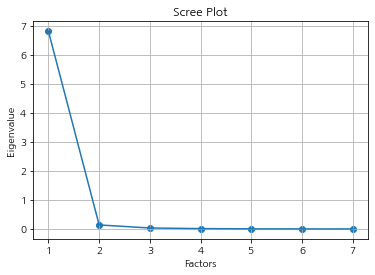

In [336]:
# df 설정 
df = ps_scaled_df

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  # 2

### 성연령별 유동인구

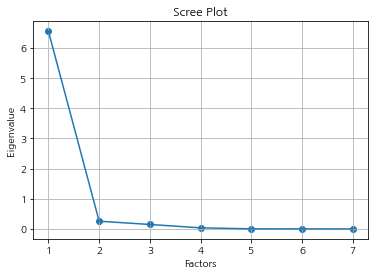

In [361]:
 # 행정동별 유동인구
# 데이터 프레임 설정 
scaled_df = trans21_tt_scaled

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(scaled_df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib
plt.scatter(range(1,scaled_df.shape[1]+1),ev)
plt.plot(range(1,scaled_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  # 2선택

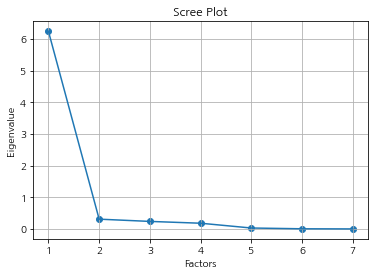

In [375]:
# 전체 유동인구
# df 설정 
df = trans21_t_scaled

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  # 2

### 학교 데이터

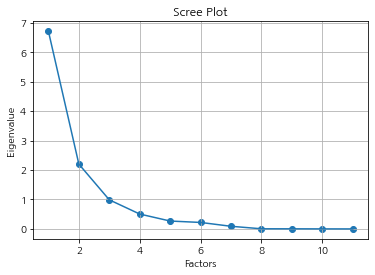

In [278]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=25, rotation=None)
fa.fit(scho_scaled_df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# Create scree plot using matplotlib

plt.scatter(range(1,scho_scaled_df.shape[1]+1),ev)
plt.plot(range(1,scho_scaled_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()  # 4선택

## EFA
요인분석할 데이터는 거주등록인구, 성연령별 유동인구, 학교 인구 만을 사용
- 문화시설데이터, 교통데이터, 산업 소비 데이터는 

### 거주등록인구

<AxesSubplot:>

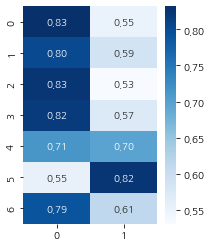

In [451]:
# df 설정  pop_ssub
df = ps_scaled_df

# Create factor analysis object and perform factor analysis using 4 factors

fa = FactorAnalyzer(n_factors=2,rotation='varimax') # 요인 4 
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_,index=df.columns)
efa_result

plt.figure(figsize=(3,4))
sns.heatmap(efa_result,cmap='Blues',annot=True, fmt='.2f') 

채택, 0요인은 0,1,2,3,6-> A 1요인은 4,5 ->B

In [460]:
ps_scaled_df.columns=['A0','A1','A2','A3','B4','B5','A6']
ps_scaled_df

,A0,A1,A2,A3,B4,B5,A6
0,0.338592,0.300834,0.285292,0.341379,0.224713,0.055343,0.278170
1,0.024414,0.034353,0.026553,0.043201,0.064631,0.076227,0.040740
2,0.213469,0.194797,0.222573,0.219063,0.226838,0.261399,0.220908
3,0.330471,0.261418,0.249731,0.346779,0.385373,0.427776,0.327432
4,0.234470,0.255163,0.171215,0.246324,0.287702,0.230653,0.234060
5,0.185331,0.195592,0.121336,0.205205,0.264129,0.263488,0.197365
6,0.432370,0.424245,0.308954,0.439037,0.485364,0.526395,0.426565
7,0.053122,0.150516,0.068365,0.077814,0.145783,0.167189,0.098015
8,0.072932,0.093229,0.101439,0.083019,0.075935,0.044553,0.080182
9,0.011897,0.024126,0.015528,0.019519,0.045020,0.117763,0.031607


<AxesSubplot:>

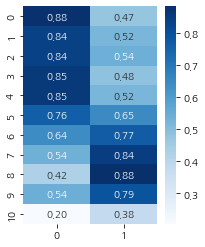

In [332]:
# df 설정 : pop_ssub2
df = ps_scaled_df

# Create factor analysis object and perform factor analysis using 4 factors

fa = FactorAnalyzer(n_factors=2,rotation='varimax') # 요인 4 
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_,index=df.columns)
efa_result

plt.figure(figsize=(3,4))
sns.heatmap(efa_result,cmap='Blues',annot=True, fmt='.2f') 

In [327]:
ps_scaled_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.278170,0.326442,0.350639,0.300834,0.285292,0.341379,0.224713,0.092761,0.021928,0.031345,0.034483,0.2
1,0.040740,0.020260,0.028533,0.034353,0.026553,0.043201,0.064631,0.080355,0.047053,0.203236,0.186207,0.2
2,0.220908,0.246026,0.181191,0.194797,0.222573,0.219063,0.226838,0.295871,0.207857,0.266936,0.303448,0.2
3,0.327432,0.306078,0.354656,0.261418,0.249731,0.346779,0.385373,0.406221,0.453175,0.558140,0.379310,0.6
4,0.234060,0.198649,0.269984,0.255163,0.171215,0.246324,0.287702,0.244029,0.233897,0.242669,0.151724,1.0
5,0.197365,0.139636,0.230635,0.195592,0.121336,0.205205,0.264129,0.268099,0.287803,0.265925,0.262069,0.2
6,0.426565,0.370494,0.493717,0.424245,0.308954,0.439037,0.485364,0.509906,0.572864,0.573306,0.462069,0.8
7,0.098015,0.035636,0.070457,0.150516,0.068365,0.077814,0.145783,0.178300,0.184559,0.163802,0.117241,0.8
8,0.080182,0.082909,0.063041,0.093229,0.101439,0.083019,0.075935,0.072579,0.043399,0.000000,0.013793,0.8
9,0.031607,0.007896,0.015863,0.024126,0.015528,0.019519,0.045020,0.098871,0.125628,0.278059,0.262069,0.4


### 성연령별 유동인구

<AxesSubplot:>

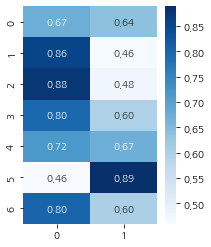

In [365]:
# 행정동별 유동인구
# df 설정 : trans21_tt_scaled
df = trans21_tt_scaled

# Create factor analysis object and perform factor analysis using 4 factors

fa = FactorAnalyzer(n_factors=2,rotation='varimax') # 요인 4 
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_,index=df.columns)
efa_result

plt.figure(figsize=(3,4))
sns.heatmap(efa_result,cmap='Blues',annot=True, fmt='.2f') 

<AxesSubplot:>

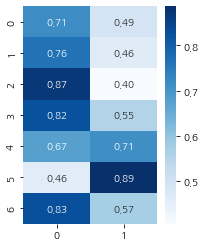

In [376]:
# 전체 유동인구
# df 설정 : trans21_t_scaled
df = trans21_t_scaled

# Create factor analysis object and perform factor analysis using 4 factors

fa = FactorAnalyzer(n_factors=2,rotation='varimax') # 요인 4 
fa.fit(df)
efa_result = pd.DataFrame(fa.loadings_,index=df.columns)
efa_result

plt.figure(figsize=(3,4))
sns.heatmap(efa_result,cmap='Blues',annot=True, fmt='.2f')  
# 유동인구의 경우, 행정동으로 묶어서 보는것은 통계오류를 일으킬수 있어 피벗하지않은 좌표단의 데이터를 이용

전체 유동인구 채택. 4,5-> B, 0,1,2,3,4,6-> A

In [463]:
trans21_t_scaled.columns=['A0','A1','A2','A3','B4','B5','A6']
trans21_t_scaled

,A0,A1,A2,A3,B4,B5,A6
0,0.000064,0.000060,0.000070,0.000124,0.000109,0.000083,0.000104
1,0.000195,0.000168,0.000100,0.000167,0.000285,0.000515,0.000255
2,0.001662,0.001460,0.001564,0.002771,0.003435,0.003042,0.002696
3,0.000334,0.000294,0.000337,0.000547,0.000437,0.000255,0.000466
4,0.015711,0.015676,0.017195,0.031516,0.030664,0.023506,0.026862
...,...,...,...,...,...,...,...
1058697,0.000000,0.000000,0.000005,0.000010,0.000006,0.000000,0.000005
1058698,0.000257,0.000212,0.000222,0.000333,0.000324,0.000298,0.000335
1058699,0.000104,0.000136,0.000138,0.000271,0.000433,0.000450,0.000276
1058700,0.000149,0.000169,0.000165,0.000286,0.000330,0.000290,0.000271


### 학교 데이터

<AxesSubplot:>

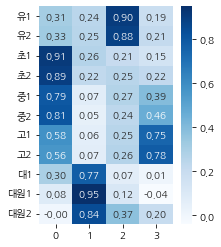

In [299]:
# Create factor analysis object and perform factor analysis using 4 factors

fa = FactorAnalyzer(n_factors=4,rotation='varimax') # 요인 4 
fa.fit(scho_scaled_df)
efa_result = pd.DataFrame(fa.loadings_,index=scho_scaled_df.columns)
efa_result

plt.figure(figsize=(3,4))
sns.heatmap(efa_result,cmap='Blues',annot=True, fmt='.2f') 

요인 0은 초등학교 학생수, 중학교수에 높은 요인 적재량을 가진다.

요인 1은 대학생수 및 대학원생수에 높은 요인 적재량을 가진다.

요인 2는 유치원생수에 높은 요인 적재량을 가진다.

요인 3은 고등학생수에 높은 요인 적재량을 가진다.

In [285]:
#  따라서 요인 4로 분석 
fa = FactorAnalyzer(n_factors=4,rotation='varimax') # 요인 4 
fa.fit(scho_scaled_df)

fa.get_factor_variance()
df1 = pd.DataFrame(fa.get_factor_variance())

df1.index = ['SS Loadings','Proportion Var','Cumulative Var']
df1

,0,1,2,3
SS Loadings,3.842063,2.451796,2.110020,1.721025
Proportion Var,0.349278,0.222891,0.191820,0.156457
Cumulative Var,0.349278,0.572169,0.763989,0.920446


## 신뢰도 계수 확인

In [150]:
def CronbachAlpha(itemscores):
    itemscores = np.asarray(itemscores)
    itemvars = itemscores.var(axis=0, ddof = 1)
    tscores = itemscores.sum(axis=1)
    nitems = itemscores.shape[1]
    return (nitems/ (nitems-1))* (1-(itemvars.sum())/ tscores.var(ddof=1))

### 거주등록인구

In [461]:
# 요인끼리 묶어 주기 ps_scaled_df
factors = ['A','B'] # A 는 유소년층+청년층+노년층 빼고, B는 중장년층
factors_items_dict ={}
for factor in factors:
    factors_items_dict[factor] = [x for x in ps_scaled_df.columns if x[0]==factor]
    
print(factors_items_dict) # 확인

# 신뢰도 계수 확인
for key,value in factors_items_dict.items():
    print(key,':', CronbachAlpha(ps_scaled_df[value]))

{'A': ['A0', 'A1', 'A2', 'A3', 'A6'], 'B': ['B4', 'B5']}
A : 0.9976068317850719
B : 0.9844711086296141


### 성연령별 유동인구

In [464]:
# 요인끼리 묶어 주기 trans21_t_scaled
factors = ['A','B'] # A 는 유소년층+청년층+노년층 빼고, B는 중장년층
factors_items_dict ={}
for factor in factors:
    factors_items_dict[factor] = [x for x in trans21_t_scaled.columns if x[0]==factor]
    
print(factors_items_dict) # 확인

# 신뢰도 계수 확인
for key,value in factors_items_dict.items():
    print(key,':', CronbachAlpha(trans21_t_scaled[value]))

{'A': ['A0', 'A1', 'A2', 'A3', 'A6'], 'B': ['B4', 'B5']}
A : 0.9683909282767842
B : 0.9711997261465342


### 학교 데이터

In [287]:
# 요인끼리 묶어 주기
factors = ['유','초','중','고','대']
factors_items_dict ={}
for factor in factors:
    factors_items_dict[factor] = [x for x in scho_scaled_df.columns if x[0]==factor]
    
factors_items_dict # 여기서 '중'과 '초'는 하나로 묶임

{'유': ['유1', '유2'],
 '초': ['초1', '초2'],
 '중': ['중1', '중2'],
 '고': ['고1', '고2'],
 '대': ['대1', '대원1', '대원2']}

In [295]:
# 요인명 확인후 직접 조작
factors_items_dict_final ={}
factors_items_dict_final['유']= factors_items_dict['유']
factors_items_dict_final['초중']=factors_items_dict['초']+factors_items_dict['중']
factors_items_dict_final['고']= factors_items_dict['고']
factors_items_dict_final['대']= factors_items_dict['대']
factors_items_dict_final

{'유': ['유1', '유2'],
 '초중': ['초1', '초2', '중1', '중2'],
 '고': ['고1', '고2'],
 '대': ['대1', '대원1', '대원2']}

In [297]:
for key,value in factors_items_dict_final.items():
    print(key,':', CronbachAlpha(scho_scaled_df[value]))
# 4요인 모두 신뢰도 높음

유 : 0.9988020671817643
초중 : 0.9673929336140599
고 : 0.9972027786630917
대 : 0.8947106750554173


In [298]:
for key,value in factors_items_dict.items():
    print(key,':', CronbachAlpha(scho_scaled_df[value]))

유 : 0.9988020671817643
초 : 0.9955188089150044
중 : 0.993833511880744
고 : 0.9972027786630917
대 : 0.8947106750554173


# 2. 데이터 정의서 작성에 필요하여 데이터 확인용

In [17]:
pop

,행정기관코드,행정기관,Unnamed: 2,Unnamed: 3,측정년도,측정월,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,60~69세,70~79세,80~89세,90~99세,100세 이상,행정동중심_위도,행정동중심_경도
0,4420033000,충청남도,아산시,탕정면,2019,1,20681,3380,2676,2579,4483,3921,1915,859,524,295,49,0,36.809157,127.068452
1,4420033000,충청남도,아산시,탕정면,2019,2,20674,3338,2678,2581,4457,3948,1937,865,526,298,46,0,36.809157,127.068452
2,4420033000,충청남도,아산시,탕정면,2019,3,20679,3323,2675,2591,4434,3956,1962,867,529,295,47,0,36.809157,127.068452
3,4420033000,충청남도,아산시,탕정면,2019,4,20645,3295,2681,2570,4393,3973,1986,871,533,295,48,0,36.809157,127.068452
4,4420033000,충청남도,아산시,탕정면,2019,5,20642,3274,2696,2560,4365,3975,2011,882,537,295,47,0,36.809157,127.068452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,4420040000,충청남도,아산시,도고면,2022,2,4407,105,161,321,289,384,815,1039,701,531,59,2,36.740800,126.904044
710,4420040000,충청남도,아산시,도고면,2022,3,4403,111,165,312,292,386,805,1043,692,535,61,1,36.740800,126.904044
711,4420040000,충청남도,아산시,도고면,2022,4,4428,108,167,312,287,395,807,1057,688,544,62,1,36.740800,126.904044
712,4420040000,충청남도,아산시,도고면,2022,5,4439,110,169,318,282,403,808,1056,687,541,64,1,36.740800,126.904044


In [21]:
libr.iloc[:,:-5]

,LBRRY_CD,LBRRY_NM,LBRRY_ADDR,LBRRY_LA,LBRRY_LO,ONE_AREA_NM,TWO_AREA_NM,LBRRY_NO,API_LBRRY_NO,TELNO,...,BSNS_PARTCPTN_YEAR,MASTR_LBRRY_CD,LBRRY_NCM_NM,ETC_LBRRY_CD,AREA_CD,ETC_LBRRY_ADDR,ETC_LBRRY_NM,TWO_ETC_LBRRY_NM,REPRSNT_YN,ONE_AREA_CD
0,26100,아산시 중앙도서관,충청남도 아산시 남부로 229,36.771209,127.009291,충청남도,아산시,144174,144174,041-530-6600,...,2019,26100,중앙,MF,3,NaN,NaN,NaN,Y,충청남도
1,26101,아산시 송곡도서관,충청남도 아산시 염치읍 송곡남길 82-4,36.800203,127.014193,충청남도,아산시,144038,144038,041-537-3951,...,2019,26100,송곡,MA,3,NaN,NaN,NaN,N,충청남도
2,26102,아산시 배방도서관,충청남도 아산시 배방읍 모산로 140-12,36.773912,127.057794,충청남도,아산시,144037,144037,041-537-3956,...,2019,26100,배방,MC,3,NaN,NaN,NaN,N,충청남도
3,26103,아산시 둔포도서관,충청남도 아산시 둔포면 둔포중앙로161번길 27-6,36.926741,127.040786,충청남도,아산시,144024,144024,041-536-8595,...,2019,26100,둔포,MB,3,NaN,NaN,NaN,N,충청남도
4,26104,아산시 꿈샘어린이청소년도서관,충청남도 아산시 시민로 500,36.794453,127.004305,충청남도,아산시,144045,144045,041-530-6721,...,2019,26100,꿈샘,CH,3,NaN,NaN,NaN,N,충청남도
5,26105,아산시 탕정온샘도서관,충청남도 아산시 탕정면 한내로 209,36.790242,127.054012,충청남도,아산시,144172,144172,041-536-8740,...,2019,26100,탕정온샘,ME,3,NaN,NaN,NaN,N,충청남도


In [19]:
libr1

,도서관명,대출건수,위도,경도,회원수
0,아산중앙도서관,1924590,36.800203,127.014193,0
1,아산시꿈샘어린이청소년도서관,215687,36.794453,127.004305,4539
2,아산시둔포도서관,133018,36.926392,127.040898,4423
3,아산시배방도서관,577428,36.773912,127.057794,10347
4,아산시송곡도서관,243743,36.791932,126.957919,589
5,아산시탕정온샘도서관,956270,36.794466,127.053943,0


In [22]:
shop

,Unnamed: 0,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,...,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도,행정동중심_위도,행정동중심_경도
0,0,28487726,큰집아구복,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,...,충청남도 아산시 온천대로 1509-7,336010,31514,NaN,NaN,NaN,127.005505,36.781602,36.787194,126.999478
1,1,22942740,해동장모텔,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,...,충청남도 아산시 시민로 364-13,336010,31513,NaN,NaN,NaN,127.001374,36.781396,36.778414,127.003379
2,2,28507428,필드파크,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,...,충청남도 아산시 배방읍 온천대로 2015-8,336852,31477,NaN,1,NaN,127.059126,36.778587,36.754095,127.068357
3,3,21662036,서해장식,NaN,D,소매,D07,가정/주방/인테리어,D07A14,지물판매,...,충청남도 아산시 시민로 295,336050,31567,NaN,1,NaN,126.995997,36.776188,36.775216,126.996027
4,4,20763901,한아름헤어샵,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,...,충청남도 아산시 배방읍 새아산로 20-10,336857,31468,NaN,2,NaN,127.093092,36.783447,36.754095,127.068357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12920,12920,18450125,한국제이티상사,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,...,충청남도 아산시 영인면 신봉길242번길 35-5,336822,31422,2,NaN,NaN,126.993690,36.897643,36.885130,126.962584
12921,12921,18453647,망파상점,NaN,D,소매,D06,가방/신발/액세서리,D06A05,액세서리판매,...,충청남도 아산시 탕정면 매곡천길 149,336843,31461,NaN,3,NaN,127.081303,36.789295,36.809157,127.068452
12922,12922,18457530,아산숯숯,NaN,D,소매,D01,음/식료품소매,D01A06,육류소매,...,충청남도 아산시 신창면 순천향로 81,336885,31537,NaN,NaN,NaN,126.938323,36.770046,36.790769,126.933819
12923,12923,18460201,알라딘,마라탕,Q,음식,Q02,중식,Q02A00,중국음식/중국집,...,충청남도 아산시 탕정면 한들물빛5로 36,336843,31465,G,2,NaN,127.086857,36.785832,36.809157,127.068452


In [30]:
bus

,Unnamed: 0,정류장아이디,정류장 명칭,정류장 유형,중앙차로 여부,노드영문명,위도,경도,수집일시,단축아이디,도시코드,도시명,주소,행정동,"법정동,리",행정동중심_위도,행정동중심_경도,법정동중심_위도,법정동중심_경도
0,0,ASB288000226,창덕에버빌,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,226,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
1,1,ASB288000228,신곡1리,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,228,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
2,2,ASB288000229,신곡1리,1,N,NaN,36.818911,126.898581,2021-09-16 05:01:25,229,34040,아산시,충청남도 아산시 신창면 신곡리,신창면,신곡리,36.790769,126.933819,36.814399,126.900107
3,3,ASB288000230,가덕2리 덕동,1,N,NaN,36.813995,126.924297,2021-09-16 05:01:25,230,34040,아산시,충청남도 아산시 신창면 가덕리,신창면,가덕리,36.790769,126.933819,36.812902,126.918347
4,4,ASB288000232,가덕2리 금이,1,N,NaN,36.813995,126.924297,2021-09-16 05:01:25,232,34040,아산시,충청남도 아산시 신창면 가덕리,신창면,가덕리,36.790769,126.933819,36.812902,126.918347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,1820,ASB288010805,LH7단지아파트건너,1,N,NaN,36.770198,127.095808,2021-09-16 05:01:25,10805,34040,아산시,충청남도 아산시 배방읍 세교리,배방읍,세교리,36.754095,127.068357,36.768902,127.103198
1821,1821,ASB288010806,북수2리 주택단지,1,N,NaN,36.766700,127.071893,2021-09-16 05:01:25,10806,34040,아산시,충청남도 아산시 배방읍 북수리,배방읍,북수리,36.754095,127.068357,36.771902,127.070272
1822,1822,ASB288010807,북수2리 주택단지,1,N,NaN,36.766700,127.071893,2021-09-16 05:01:25,10807,34040,아산시,충청남도 아산시 배방읍 북수리,배방읍,북수리,36.754095,127.068357,36.771902,127.070272
1823,1823,ASB288010808,백암3리,1,N,NaN,36.805861,127.034479,2021-09-16 05:01:25,10808,34040,아산시,충청남도 아산시 염치읍 백암리,염치읍,백암리,36.821760,126.982215,36.804172,127.031958


In [34]:
trans21_t['crtr_ym'].value_counts()

202111    93946
202112    93385
202110    92883
202109    92556
202108    90083
202107    88648
202106    88061
202105    87001
202104    85500
202103    83839
202102    81919
202101    80881
Name: crtr_ym, dtype: int64

In [32]:
user

,Unnamed: 0,REC_KEY,USER_POSITION_CODE,USER_CLASS_CODE,LOAN_COUNT,RESERVATION_COUNT,DELAY_COUNT,DELAYDAY_COUNT,LOAN_STOP_DATE,LAST_LOAN_DATE,...,W_ADDR1,H_ZIPCODE,W_ZIPCODE,HANDPHONE,GPIN_SEX,위도,경도,행정동,행정동중심_위도,행정동중심_경도
0,0,1121,일반,대학 및 일반,0,0.0,25.0,NaN,NaN,06/08/04,...,NaN,336-842,NaN,NaN,남,36.822080,127.083252,탕정면,36.809157,127.068452
1,1,58,일반,대학 및 일반,0,0.0,2.0,NaN,NaN,13/01/20,...,NaN,336-863,NaN,010-3355-2130,여,36.829383,127.097204,음봉면,36.858061,127.047785
2,2,79,일반,대학 및 일반,0,0.0,36.0,NaN,NaN,20/08/26,...,NaN,31579,NaN,010-2659-1739,여,36.773882,127.023097,온양6동,36.760953,127.015723
3,3,1465,일반,청소년,0,0.0,37.0,165.0,NaN,20/06/10,...,NaN,31579,NaN,010-2659-1739,남,36.773882,127.023097,온양6동,36.760953,127.015723
4,4,1273,일반,대학 및 일반,0,0.0,2.0,NaN,NaN,15/04/29,...,NaN,336-792,NaN,010-3412-7378,남,36.786105,127.019424,온양3동,36.783503,127.012858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119762,123447,4581034013,NaN,NaN,0,0.0,0.0,0.0,NaN,NaN,...,NaN,31526,NaN,010-3152-3152,남,NaN,NaN,배방읍,36.754095,127.068357
119763,123448,4581130901,일반,대학 및 일반,2,0.0,0.0,0.0,NaN,22/08/31,...,NaN,31473,NaN,010-5454-4077,여,NaN,NaN,배방읍,36.754095,127.068357
119764,123449,4581150270,일반,대학 및 일반,3,0.0,0.0,0.0,NaN,22/09/01,...,NaN,31529,NaN,010-3345-3691,남,NaN,NaN,배방읍,36.754095,127.068357
119765,123450,4542542514,아동,아동,0,0.0,4.0,368.0,NaN,22/08/20,...,NaN,31528,NaN,010-9317-8301,여,NaN,NaN,배방읍,36.754095,127.068357


In [38]:
loan_s

,USER_KEY,LOAN_DATE,MANAGE_CODE
0,70035021,21/03/21,아산시탕정온샘도서관
1,70035021,21/03/21,아산시탕정온샘도서관
2,73662669,21/04/01,아산중앙도서관
3,1003681570,20/06/05,아산시배방도서관
4,1004248404,20/05/27,아산시배방도서관
...,...,...,...
4216064,4525701755,21/02/02,아산중앙도서관
4216065,4511558378,21/02/02,아산시배방도서관
4216066,4534138102,21/01/30,아산시송곡도서관
4216067,4534138102,21/01/30,아산시송곡도서관
